In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [2]:
# Load the data
bp = pd.read_csv("bpdata.csv")

In [3]:
# Handle missing values
bp['Pregnancy'] = bp['Pregnancy'].fillna(0)
bp['Genetic_Pedigree_Coefficient'] = bp['Genetic_Pedigree_Coefficient'].fillna(0)
bp['alcohol_consumption_per_day'] = bp['alcohol_consumption_per_day'].fillna(0)


In [4]:
# Select features and target variable
bp_x = bp[["Sex", "Age", "Level_of_Hemoglobin", "Genetic_Pedigree_Coefficient", "BMI",
           "Pregnancy", "alcohol_consumption_per_day", "Level_of_Stress", "Smoking",
           "Chronic_kidney_disease", "Adrenal_and_thyroid_disorders"]]
bp_y = bp["Blood_Pressure_Abnormality"]


In [5]:
# Split the data into training and testing sets
bp_x_train, bp_x_test, bp_y_train, bp_y_test = train_test_split(bp_x, bp_y, test_size=0.2, random_state=42)


In [11]:
# Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(bp_x_train, bp_y_train)
y_pred_class = clf.predict(bp_x_test)

print("Decision Tree:")
print("Training Accuracy:", clf.score(bp_x_train, bp_y_train))
print("Test Accuracy:", accuracy_score(bp_y_test, y_pred_class))

# Cross-validation score
cv_score = cross_val_score(clf, bp_x, bp_y, cv=5)
print("Cross-Validation Score:", cv_score.mean())


# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(bp_y_test, y_pred_class))

print("\nClassification Report:")
print(classification_report(bp_y_test, y_pred_class))


Decision Tree:
Training Accuracy: 1.0
Test Accuracy: 0.82
Cross-Validation Score: 0.8300000000000001

Confusion Matrix:
[[177  46]
 [ 26 151]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       223
           1       0.77      0.85      0.81       177

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400



In [13]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(bp_x_train, bp_y_train)
y_pred_class_rf = rf.predict(bp_x_test)

print("\nRandom Forest:")
print("Training Accuracy:", rf.score(bp_x_train, bp_y_train))
print("Test Accuracy:", accuracy_score(bp_y_test, y_pred_class_rf))

# Cross-validation score
cv_score_rf = cross_val_score(rf, bp_x, bp_y, cv=5)
print("Cross-Validation Score:", cv_score_rf.mean())

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(bp_y_test, y_pred_class_rf))

print("\nClassification Report:")
print(classification_report(bp_y_test, y_pred_class_rf))



Random Forest:
Training Accuracy: 1.0
Test Accuracy: 0.875
Cross-Validation Score: 0.8799999999999999

Confusion Matrix:
[[190  33]
 [ 17 160]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       223
           1       0.83      0.90      0.86       177

    accuracy                           0.88       400
   macro avg       0.87      0.88      0.87       400
weighted avg       0.88      0.88      0.88       400



In [14]:
# Support Vector Machine (SVM)
svm = SVC(random_state=42, probability=True)
svm.fit(bp_x_train, bp_y_train)
y_pred_class_svm = svm.predict(bp_x_test)

print("\nSVM:")
print("Training Accuracy:", svm.score(bp_x_train, bp_y_train))
print("Test Accuracy:", accuracy_score(bp_y_test, y_pred_class_svm))

# Cross-validation score
cv_score_svm = cross_val_score(svm, bp_x, bp_y, cv=5)
print("Cross-Validation Score:", cv_score_svm.mean())

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(bp_y_test, y_pred_class_svm))

print("\nClassification Report:")
print(classification_report(bp_y_test, y_pred_class_svm))


SVM:
Training Accuracy: 0.521875
Test Accuracy: 0.54
Cross-Validation Score: 0.523

Confusion Matrix:
[[124  99]
 [ 85  92]]

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.56      0.57       223
           1       0.48      0.52      0.50       177

    accuracy                           0.54       400
   macro avg       0.54      0.54      0.54       400
weighted avg       0.54      0.54      0.54       400



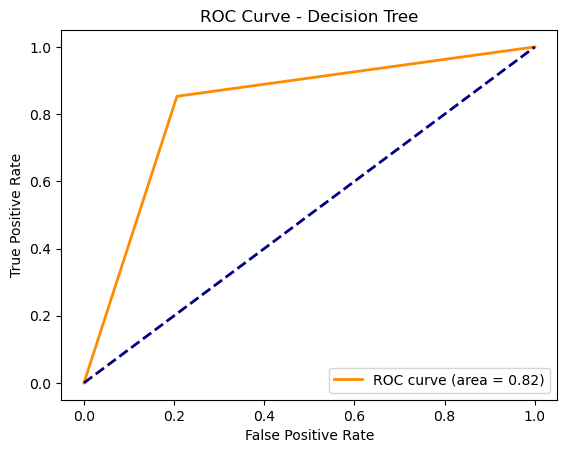

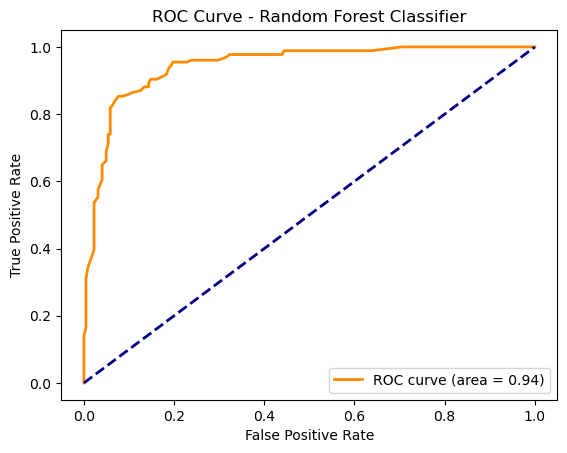

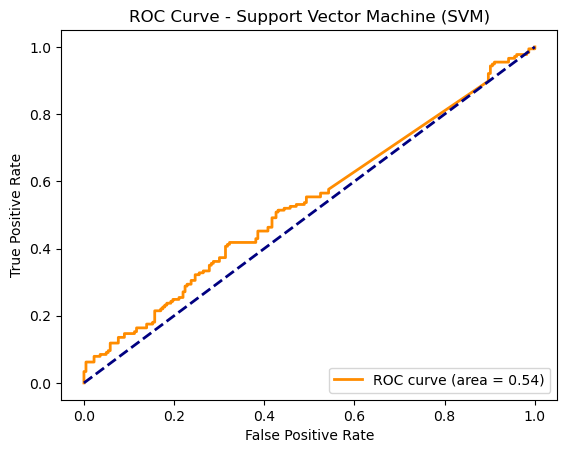

In [20]:

# Plot ROC curve and calculate AUC for Decision Tree
fpr, tpr, _ = roc_curve(bp_y_test, clf.predict_proba(bp_x_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()

# Plot ROC curve and calculate AUC for Random Forest Classifier
fpr_rf, tpr_rf, _ = roc_curve(bp_y_test, rf.predict_proba(bp_x_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()

# Plot ROC curve and calculate AUC for Support Vector Machine (SVM)
fpr_svm, tpr_svm, _ = roc_curve(bp_y_test, svm.predict_proba(bp_x_test)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Support Vector Machine (SVM)')
plt.legend(loc='lower right')
plt.show()




In [19]:
# Predicting the Best Model based on AUC
models_auc = {'Decision Tree': auc(fpr, tpr),
              'Random Forest': auc(fpr_rf, tpr_rf),
              'SVM': auc(fpr_svm, tpr_svm)}

best_model_name_auc = max(models_auc, key=models_auc.get)
best_model_auc = clf if best_model_name_auc == 'Decision Tree' else (
    rf if best_model_name_auc == 'Random Forest' else svm)

print("\nBest Model based on AUC:", best_model_name_auc)


Best Model based on AUC: Random Forest
